<a href="https://colab.research.google.com/github/varshu11/INSE-6220-PROJECT/blob/main/INSE_6220_Occupancy%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRINCIPAL COMPONENT ANALYSIS, CLASSIFICATION AND PREDICTION USING MACHINE LEARNING**

---



Installing PyCaret

In [145]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from pycaret.utils import version
version()

'2.3.10'

Importing Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


Dataset

The goal of this study was to predict the occupancy of office rooms using sensors that measure CO2 levels,humidity,humidity ratio, light, occupancy, occupancy status(occupied=1,not occupied=0).
Dataset is effictive in applying classification and clustering techniques.

Attribute Information:

1. Temperature, in Celsius
2. Relative Humidity, %
3. Light, in Lux
4. CO2, in ppm
5. Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air
6. Occupancy(type), 0 or 1, 0 for not occupied, 1 for occupied status-categorical

https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#





In [78]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/varshu11/INSE-6220-PROJECT/main/datatest.csv')
df.head(25)

Temperature  Humidity       Light         CO2  Humidity ratio  type
0       23.7000   26.2720  585.200000  749.200000        0.004764     0
1       23.7180   26.2900  578.400000  760.400000        0.004773     0
2       23.7300   26.2300  572.666667  769.666667        0.004765     0
3       23.7225   26.1250  493.750000  774.750000        0.004744     0
4       23.7540   26.2000  488.600000  779.000000        0.004767     0
5       23.7600   26.2600  568.666667  790.000000        0.004779     0
6       23.7300   26.2900  536.333333  798.000000        0.004776     0
7       23.7540   26.2900  509.000000  797.000000        0.004783     0
8       23.7540   26.3500  476.000000  803.200000        0.004794     0
9       23.7360   26.3900  510.000000  809.000000        0.004796     0
10      23.7450   26.4450  481.500000  815.250000        0.004809     0
11      23.7000   26.5600  481.800000  824.000000        0.004817     0
12      23.7000   26.6000  475.250000  832.000000        0.004824     0
13      23.7000   26.7000  469.000000  845.333333        0.004842     0
14      23.7000   26.7740  464.000000  852.400000        0.004856     0
15      23.7000   26.8900  464.000000  861.000000        0.004877     0
16      23.7000   26.9725  455.000000  880.000000        0.004892     0
17      23.6000   26.8900  454.000000  891.000000        0.004848     0
18      23.6400   26.9760  458.000000  897.600000        0.004875     0
19      23.6500   27.0500  464.000000  900.500000        0.004891     0
20      23.6400   27.1000  473.000000  908.800000        0.004898     0
21      23.6000   27.1600  464.000000  918.000000        0.004897     0
22      23.6000   27.2360  498.400000  925.200000        0.004910     0
23      23.6000   27.2900  530.200000  929.400000        0.004920     0
24      23.6000   27.3300  533.600000  936.400000        0.004928     0

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     174 non-null    float64
 1   Humidity        174 non-null    float64
 2   Light           174 non-null    float64
 3   CO2             174 non-null    float64
 4   Humidity ratio  174 non-null    float64
 5   type            174 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 8.3 KB


In [80]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [81]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


Exploratory Analysis

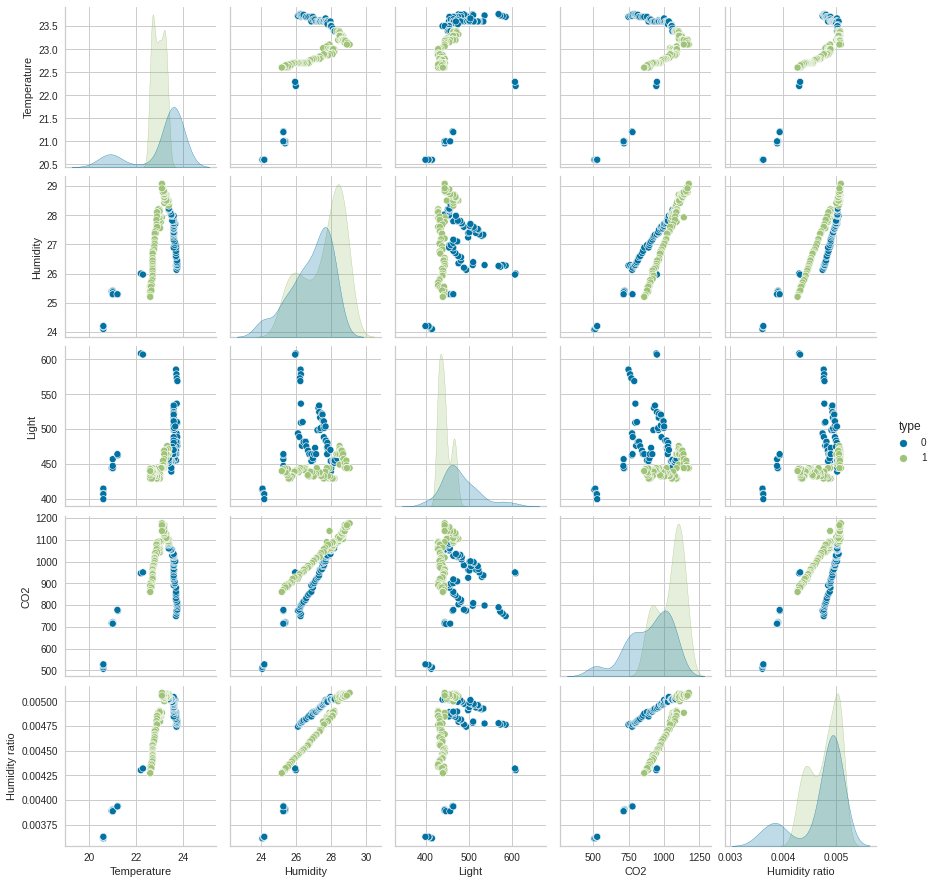

In [82]:
sns.pairplot(df, hue='type')
plt.show()

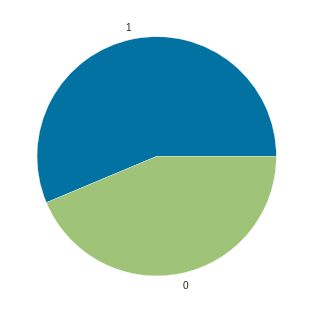

In [83]:
y =df['type']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Data Matrix

In [84]:
X = df.drop(columns=['type'])
X.head(10)

Temperature  Humidity       Light         CO2  Humidity ratio
0      23.7000    26.272  585.200000  749.200000        0.004764
1      23.7180    26.290  578.400000  760.400000        0.004773
2      23.7300    26.230  572.666667  769.666667        0.004765
3      23.7225    26.125  493.750000  774.750000        0.004744
4      23.7540    26.200  488.600000  779.000000        0.004767
5      23.7600    26.260  568.666667  790.000000        0.004779
6      23.7300    26.290  536.333333  798.000000        0.004776
7      23.7540    26.290  509.000000  797.000000        0.004783
8      23.7540    26.350  476.000000  803.200000        0.004794
9      23.7360    26.390  510.000000  809.000000        0.004796

In [85]:
X.describe().transpose()

count        mean         std         min         25%  \
Temperature     174.0   23.006905    0.731732   20.600000   22.731875   
Humidity        174.0   27.263706    1.213396   24.083333   26.290000   
Light           174.0  459.763355   35.338275  399.500000  438.000000   
CO2             174.0  979.523180  143.259626  507.333333  900.975000   
Humidity ratio  174.0    0.004751    0.000364    0.003609    0.004573   

                        50%          75%          max  
Temperature       23.190000    23.566250    23.760000  
Humidity          27.600000    28.200000    29.075000  
Light            451.600000   469.000000   608.250000  
CO2             1016.571429  1087.875000  1176.166667  
Humidity ratio     0.004876     0.005021     0.005088

Standardize the Data

In [86]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Temperature  Humidity     Light       CO2  Humidity ratio
0     0.949931 -0.819657  3.559841 -1.612373        0.036137
1     0.974602 -0.804780  3.366860 -1.533967        0.059568
2     0.991048 -0.854370  3.204151 -1.469096        0.038867
3     0.980769 -0.941154  0.964527 -1.433510       -0.020083
4     1.023942 -0.879166  0.818372 -1.403758        0.042840
5     1.032165 -0.829575  3.090632 -1.326753        0.077961
6     0.991048 -0.804780  2.173025 -1.270749        0.069149
7     1.023942 -0.804780  1.397316 -1.277750        0.088334
8     1.023942 -0.755189  0.460789 -1.234347        0.118663
9     0.999272 -0.722128  1.425696 -1.193744        0.124440

In [87]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Temperature     174.0  6.043697e-15  1.002886 -3.298820 -0.376947  0.250943   
Humidity        174.0  5.329071e-15  1.002886 -2.628615 -0.804780  0.277951   
Light           174.0  1.102566e-15  1.002886 -1.710250 -0.617635 -0.231673   
CO2             174.0 -8.167158e-16  1.002886 -3.305555 -0.549875  0.259355   
Humidity ratio  174.0 -1.005581e-15  1.002886 -3.149084 -0.491588  0.344928   

                     75%       max  
Temperature     0.766618  1.032165  
Humidity        0.773858  1.497055  
Light           0.262132  4.213991  
CO2             0.758515  1.376599  
Humidity ratio  0.744769  0.927906

Observations and Variables

In [88]:
observations = list(df.index)
variables = list(df.columns)

Box and Whisker plots

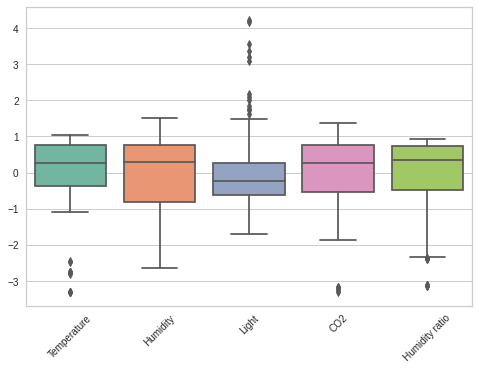

In [89]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

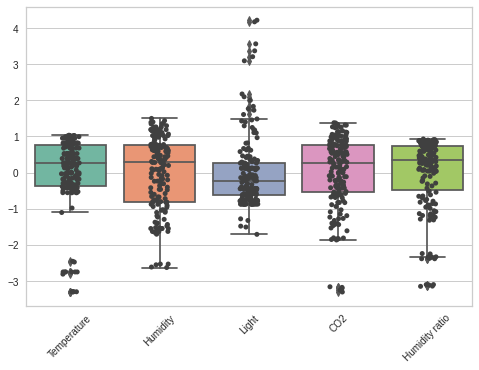

In [90]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Correlation Matrix

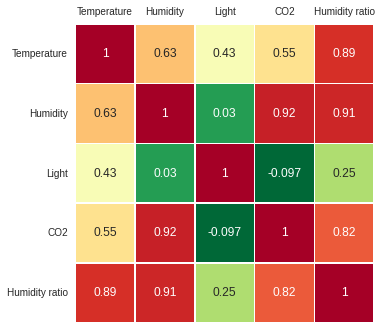

In [91]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# Principal component Analysis

---






Using PCA Library

In [92]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


Principal Components

In [94]:
out['PC']

PC1       PC2       PC3
0    0.272872  4.075680  0.330084
1    0.228544  3.890940  0.242714
2    0.246949  3.746601  0.157319
3    0.594296  1.856794 -0.996098
4    0.513580  1.725781 -1.079874
..        ...       ...       ...
169  2.061779 -0.053998 -0.400494
170  2.038052 -0.143425 -0.547245
171  2.215340 -0.004603 -0.488967
172  2.284087 -0.041894 -0.557595
173  2.297501 -0.037878 -0.562205

[174 rows x 3 columns]

Scatter Plot

[colourmap]> Warning: Colormap [Set1] can not create [174] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [174] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f16bdc98b10>)

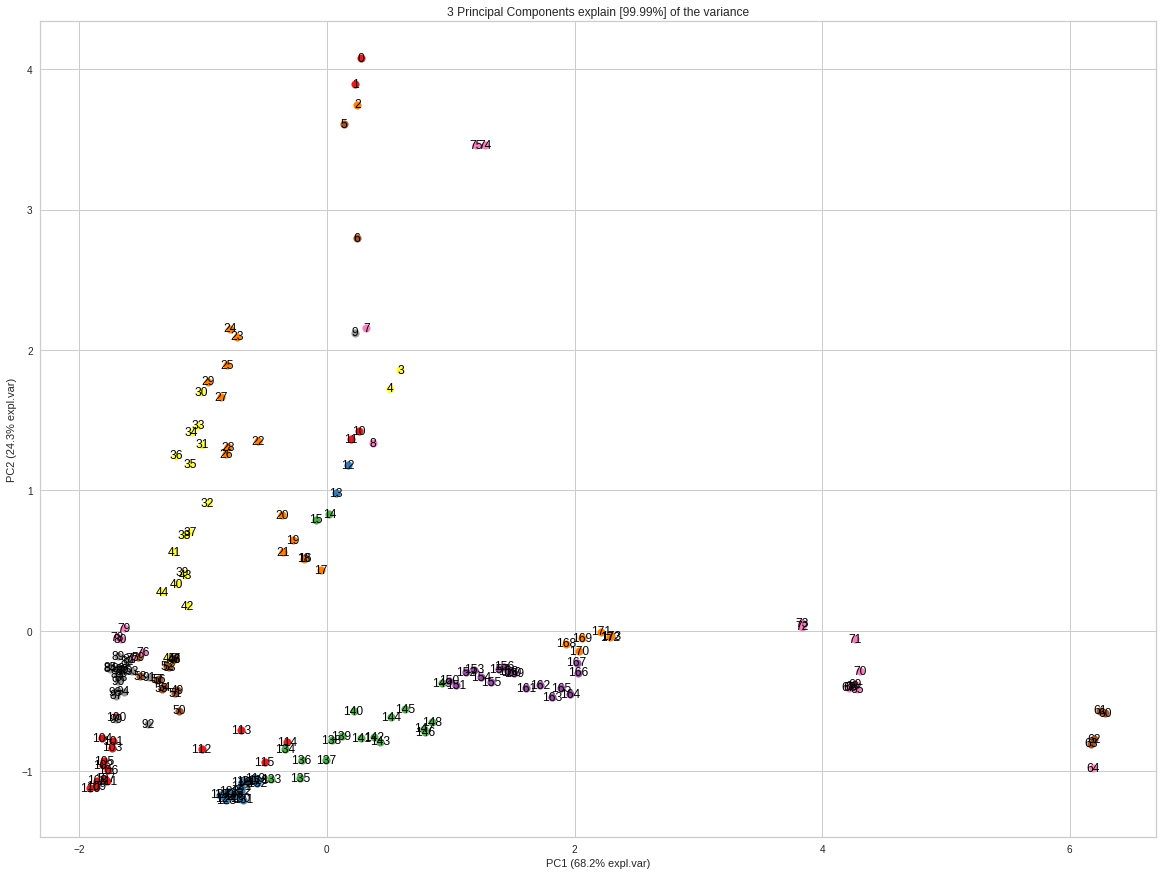

In [95]:
model.scatter(label=True, legend=False)

Eigen Vectors

In [96]:
A = out['loadings'].T

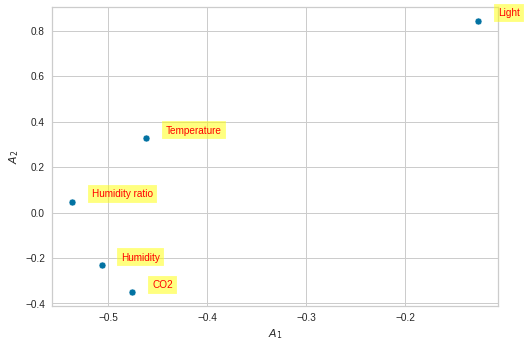

In [97]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Scree Plot

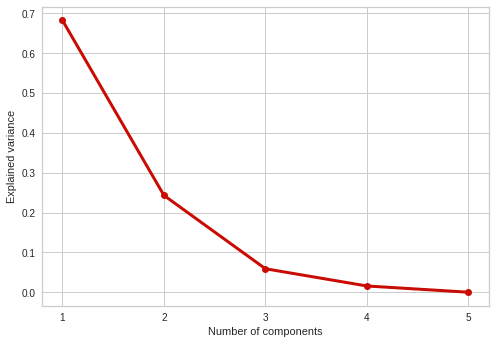

In [98]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

Explained Variance Plot

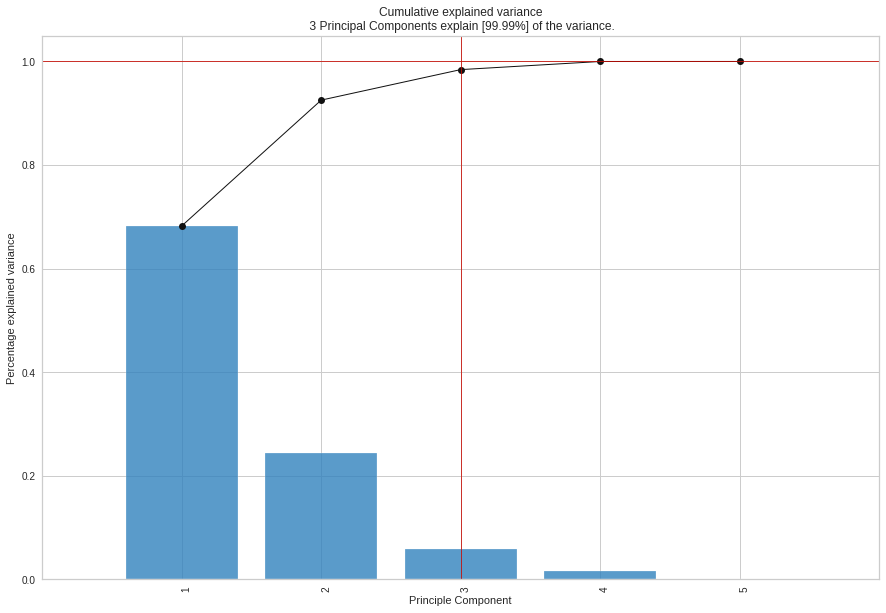

<Figure size 576x396 with 0 Axes>

In [99]:
model.plot();

Biplot

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [174] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [174] unique colors! Available unique colors: [9].


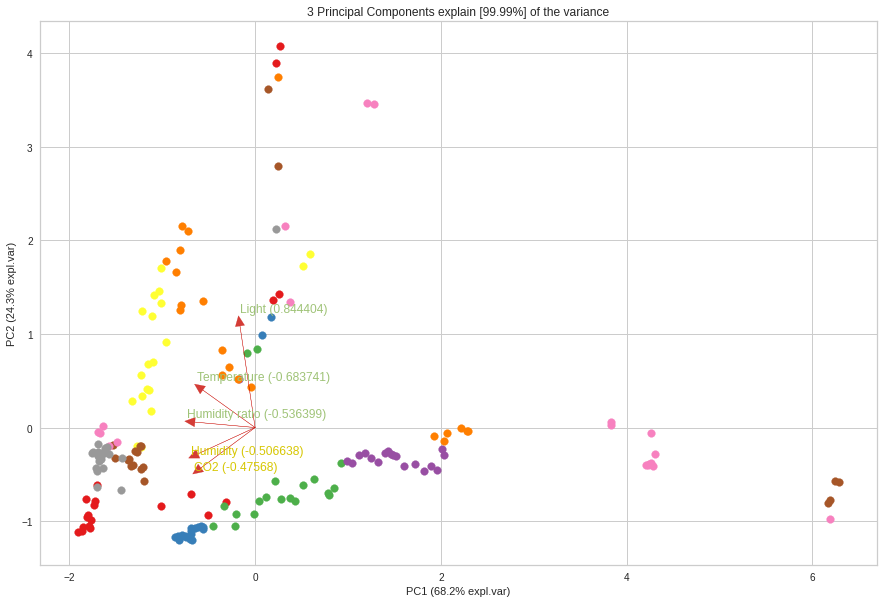

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f16bdf9d5d0>)

In [100]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [174] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [174] unique colors! Available unique colors: [9].


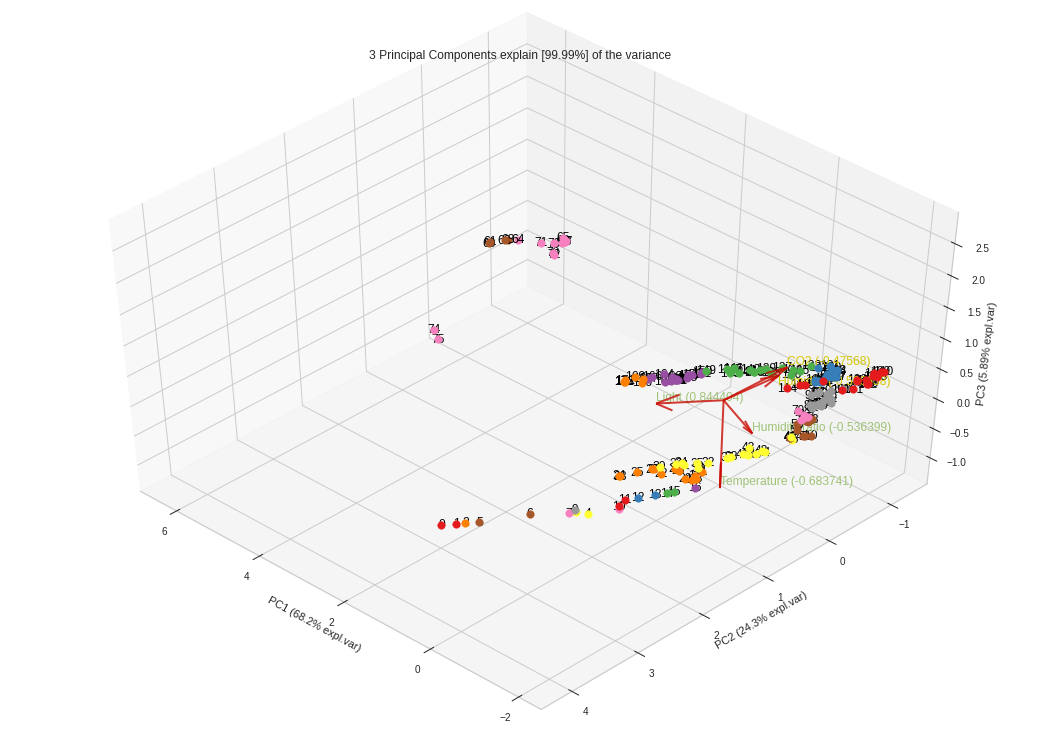

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f16bf4f03d0>)

In [101]:
model.biplot3d(legend=False)

## Classification


---



In [102]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.10'

In [103]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [104]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (157, 6)
Unseen Data For Predictions: (17, 6)


In [105]:
from pycaret.classification import *
clf = setup(data=data, target='type', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target              type
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (157, 6)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (109, 5)
12                    Transformed Test Set           (48, 5)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              ca76
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='type',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing all models**

In [106]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
ada                  Ada Boost Classifier    1.0000  1.0000  1.0000  1.0000   
et                 Extra Trees Classifier    1.0000  1.0000  1.0000  1.0000   
dt               Decision Tree Classifier    0.9909  0.9917  0.9833  1.0000   
rf               Random Forest Classifier    0.9909  1.0000  0.9833  1.0000   
qda       Quadratic Discriminant Analysis    0.9909  0.9967  0.9833  1.0000   
gbc          Gradient Boosting Classifier    0.9909  0.9917  0.9833  1.0000   
lightgbm  Light Gradient Boosting Machine    0.9909  1.0000  1.0000  0.9875   
knn                K Neighbors Classifier    0.9545  0.9739  1.0000  0.9339   
lda          Linear Discriminant Analysis    0.9273  0.9933  1.0000  0.9038   
lr                    Logistic Regression    0.9182  0.9757  1.0000  0.8895   
ridge                    Ridge Classifier    0.9000  0.0000  1.0000  0.8710   
nb                            Naive Bayes    0.8536  0.9340  0.9214  0.8623   
svm                   SVM - Linear Kernel    0.7264  0.0000  0.7905  0.7159   
dummy                    Dummy Classifier    0.5873  0.5000  1.0000  0.5873   

              F1   Kappa     MCC  TT (Sec)  
ada       1.0000  1.0000  1.0000     0.095  
et        1.0000  1.0000  1.0000     0.498  
dt        0.9909  0.9820  0.9833     0.014  
rf        0.9909  0.9820  0.9833     0.464  
qda       0.9909  0.9820  0.9833     0.015  
gbc       0.9909  0.9820  0.9833     0.110  
lightgbm  0.9933  0.9792  0.9810     0.118  
knn       0.9646  0.9004  0.9086     0.116  
lda       0.9464  0.8347  0.8556     0.029  
lr        0.9387  0.8160  0.8384     0.388  
ridge     0.9269  0.7705  0.8022     0.016  
nb        0.8850  0.6782  0.6962     0.015  
svm       0.7145  0.4192  0.4955     0.013  
dummy     0.7391  0.0000  0.0000     0.012

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
INFO:logs:compare_models() succesfully completed......................................


In [107]:
best_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

**Create a Model**

 Creating Decision Tree Classifier 

In [108]:
dt = create_model('dt')

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
Fold                                                         
0       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
4       0.9091  0.9167  0.8333    1.0  0.9091  0.8197  0.8333
5       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
Mean    0.9909  0.9917  0.9833    1.0  0.9909  0.9820  0.9833
Std     0.0273  0.0250  0.0500    0.0  0.0273  0.0541  0.0500

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [109]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a model**

Tune a decision tree model

In [110]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
Fold                                                         
0       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
4       0.9091  1.0000  0.8333    1.0  0.9091  0.8197  0.8333
5       0.9091  0.9833  0.8333    1.0  0.9091  0.8197  0.8333
6       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
9       0.9000  1.0000  0.8333    1.0  0.9091  0.8000  0.8165
Mean    0.9718  0.9983  0.9500    1.0  0.9727  0.9439  0.9483
Std     0.0431  0.0050  0.0764    0.0  0.0417  0.0858  0.0791

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [111]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update Statmodels

In [112]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [113]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K-Neighbors Model**

In [117]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
1       0.9091  0.8571     1.0  0.8750  0.9333  0.7925  0.8101
2       0.9091  0.9821     1.0  0.8750  0.9333  0.7925  0.8101
3       0.9091  1.0000     1.0  0.8750  0.9333  0.7925  0.8101
4       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
5       0.9091  1.0000     1.0  0.8571  0.9231  0.8136  0.8281
6       0.9091  0.9000     1.0  0.8571  0.9231  0.8136  0.8281
7       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
Mean    0.9545  0.9739     1.0  0.9339  0.9646  0.9004  0.9086
Std     0.0455  0.0489     0.0  0.0664  0.0356  0.0998  0.0916

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K-Neighbors model**

In [118]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9091  0.8750  1.0000  0.8750  0.9333  0.7925  0.8101
2       0.9091  0.9821  0.8571  1.0000  0.9231  0.8136  0.8281
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9091  1.0000  0.8333  1.0000  0.9091  0.8197  0.8333
5       0.9091  0.9833  0.8333  1.0000  0.9091  0.8197  0.8333
6       0.9091  0.9000  1.0000  0.8571  0.9231  0.8136  0.8281
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9091  1.0000  0.8333  1.0000  0.9091  0.8197  0.8333
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9455  0.9740  0.9357  0.9732  0.9507  0.8879  0.8966
Std     0.0445  0.0441  0.0790  0.0537  0.0409  0.0919  0.0846

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K-Neighbors Model**

In [119]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [120]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8182  1.0000     1.0  0.7778  0.8750  0.5600  0.6236
1       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
2       0.8182  0.9286     1.0  0.7778  0.8750  0.5600  0.6236
3       0.9091  0.9286     1.0  0.8750  0.9333  0.7925  0.8101
4       0.9091  0.9667     1.0  0.8571  0.9231  0.8136  0.8281
5       0.8182  0.9333     1.0  0.7500  0.8571  0.6207  0.6708
6       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
8       0.9091  1.0000     1.0  0.8571  0.9231  0.8136  0.8281
9       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
Mean    0.9182  0.9757     1.0  0.8895  0.9387  0.8160  0.8384
Std     0.0755  0.0314     0.0  0.0978  0.0551  0.1747  0.1503

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [121]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.8182  0.7857  1.0000  0.7778  0.8750  0.5600  0.6236
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9091  1.0000  0.8333  1.0000  0.9091  0.8197  0.8333
5       0.9091  0.9667  1.0000  0.8571  0.9231  0.8136  0.8281
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9636  0.9752  0.9833  0.9635  0.9707  0.9193  0.9285
Std     0.0603  0.0640  0.0500  0.0751  0.0461  0.1399  0.1216

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:LogisticRegression(C=9.984, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [122]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=9.984, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [115]:
rf = create_model('rf')

Accuracy  AUC  Recall  Prec.      F1   Kappa     MCC
Fold                                                      
0       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
1       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
2       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
3       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
4       0.9091  1.0  0.8333    1.0  0.9091  0.8197  0.8333
5       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
6       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
7       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
8       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
9       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
Mean    0.9909  1.0  0.9833    1.0  0.9909  0.9820  0.9833
Std     0.0273  0.0  0.0500    0.0  0.0273  0.0541  0.0500

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [123]:
tuned_rf = tune_model(rf)

Accuracy  AUC  Recall  Prec.      F1   Kappa     MCC
Fold                                                      
0       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
1       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
2       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
3       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
4       0.9091  1.0  0.8333    1.0  0.9091  0.8197  0.8333
5       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
6       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
7       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
8       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
9       1.0000  1.0  1.0000    1.0  1.0000  1.0000  1.0000
Mean    0.9909  1.0  0.9833    1.0  0.9909  0.9820  0.9833
Std     0.0273  0.0  0.0500    0.0  0.0273  0.0541  0.0500

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [124]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Tune the best model**

In [125]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                               
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
Std        0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 12
INFO:logs:AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.2,
                   n_estimators=230, random_state=123)
INFO:logs:tune_model() succesfully completed......................................


In [126]:
tuned_best_model

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.2,
                   n_estimators=230, random_state=123)

**Evaluate the best model**

In [127]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.2,
                   n_estimators=230, random_state=123), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Classification + PCA


---



In [129]:
clf_pca = setup(data=data, target='type', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target              type
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (157, 6)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (109, 3)
12                    Transformed Test Set           (48, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              4839
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='type',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('dummy', Dummify(target='type')),
                ('fix_perfect', Remove_100(target='type')),
                ('clean_names', Clean_Colum_Names()),
         

In [130]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    1.0000  1.0000  1.0000  1.0000   
et                 Extra Trees Classifier    1.0000  1.0000  1.0000  1.0000   
lightgbm  Light Gradient Boosting Machine    1.0000  1.0000  1.0000  1.0000   
rf               Random Forest Classifier    0.9909  1.0000  1.0000  0.9875   
qda       Quadratic Discriminant Analysis    0.9909  1.0000  0.9833  1.0000   
gbc          Gradient Boosting Classifier    0.9909  1.0000  1.0000  0.9875   
dt               Decision Tree Classifier    0.9818  0.9792  0.9833  0.9875   
ada                  Ada Boost Classifier    0.9818  1.0000  0.9833  0.9875   
lr                    Logistic Regression    0.8818  0.9271  0.9524  0.8760   
nb                            Naive Bayes    0.8809  0.9021  0.9524  0.8760   
ridge                    Ridge Classifier    0.8173  0.0000  0.9048  0.8270   
lda          Linear Discriminant Analysis    0.8082  0.9271  0.9048  0.8192   
svm                   SVM - Linear Kernel    0.7255  0.0000  0.7524  0.7917   
dummy                    Dummy Classifier    0.5873  0.5000  1.0000  0.5873   

              F1   Kappa     MCC  TT (Sec)  
knn       1.0000  1.0000  1.0000     0.116  
et        1.0000  1.0000  1.0000     0.508  
lightgbm  1.0000  1.0000  1.0000     0.091  
rf        0.9933  0.9792  0.9810     0.461  
qda       0.9909  0.9820  0.9833     0.017  
gbc       0.9933  0.9792  0.9810     0.130  
dt        0.9842  0.9612  0.9643     0.015  
ada       0.9842  0.9612  0.9643     0.200  
lr        0.9081  0.7360  0.7533     0.319  
nb        0.9081  0.7340  0.7516     0.015  
ridge     0.8561  0.5996  0.6292     0.014  
lda       0.8509  0.5734  0.6087     0.024  
svm       0.7647  0.4320  0.4465     0.016  
dummy     0.7391  0.0000  0.0000     0.012

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [131]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune the best model**

In [132]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
Fold                                               
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
Std        0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate the Best Model**

In [133]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Explainabale AI with Shapely


---



In [134]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [137]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [138]:
import shap

In [139]:
rf_pca = create_model('rf')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                       
0       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
3       0.9091  1.0     1.0  0.8750  0.9333  0.7925  0.8101
4       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
Mean    0.9909  1.0     1.0  0.9875  0.9933  0.9792  0.9810
Std     0.0273  0.0     0.0  0.0375  0.0200  0.0623  0.0570

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [140]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                       
0       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
3       0.9091  1.0     1.0  0.8750  0.9333  0.7925  0.8101
4       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
5       0.9091  1.0     1.0  0.8571  0.9231  0.8136  0.8281
6       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0     1.0  1.0000  1.0000  1.0000  1.0000
Mean    0.9818  1.0     1.0  0.9732  0.9856  0.9606  0.9638
Std     0.0364  0.0     0.0  0.0537  0.0288  0.0789  0.0725

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


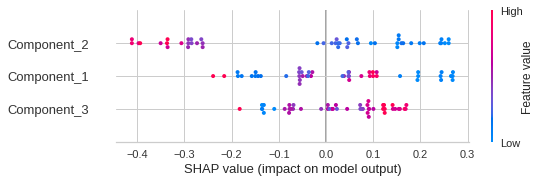

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [141]:
interpret_model(tuned_rf_pca, plot='summary')

In [142]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [143]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [144]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
